In [1]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import re
import os

"""房价爬虫"""

class PriceCrawler:
    def __init__(self):
        chrome_options = Options()
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        chrome_options.add_argument('--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36')
        
        self.driver = webdriver.Chrome(options=chrome_options)
        self.wait = WebDriverWait(self.driver, 15)
        self.base_url = "https://esf.fang.com/house-a015277-b02314"
        self.data = []
    
    def extract_info(self, text):
        """提取价格和面积信息"""
        price_match = re.search(r'<b>(\d+)</b>万', text) or re.search(r'(\d+)万', text)
        area_match = re.search(r'(\d+\.?\d*)㎡', text)
        
        price = float(price_match.group(1)) if price_match else None
        area = float(area_match.group(1)) if area_match else None
        
        return price, area
    
    def crawl_page(self, page_num):
        """爬取单页数据"""
        url = self.base_url + ("/" if page_num == 1 else f"/i3{page_num}/")
        
        try:
            self.driver.get(url)
            time.sleep(3)

            self.wait.until(
                EC.presence_of_element_located((By.CLASS_NAME, "shop_list"))
            )
            
            # 查找所有房屋条目
            house_items = self.driver.find_elements(By.CSS_SELECTOR, ".shop_list > dl")
            
            page_data_count = 0
            for item in house_items:
                try:
                    # 提取标题
                    title_elem = item.find_element(By.CSS_SELECTOR, ".tit_shop")
                    title = title_elem.text.strip()
                    
                    # 提取房屋信息
                    tel_elem = item.find_element(By.CLASS_NAME, "tel_shop")
                    house_info = tel_elem.text
                    
                    # 提取位置
                    add_elem = item.find_element(By.CLASS_NAME, "add_shop")
                    location = add_elem.text.strip()
                    
                    # 提取价格
                    price_elem = item.find_element(By.CLASS_NAME, "price_right")
                    price_html = price_elem.get_attribute('innerHTML')
                    
                    # 提取价格和面积
                    price, area = self.extract_info(price_html + " " + house_info)
                    
                    if price and area:
                        house_data = {
                            'title': title,
                            'price': price,
                            'area': area,
                            'location': location
                        }
                        self.data.append(house_data)
                        page_data_count += 1
                        
                except Exception as e:
                    continue
            
            print(f"第{page_num}页爬取成功，获取{page_data_count}条有效数据")
            return True
            
        except Exception as e:
            print(f"第{page_num}页爬取失败: {e}")
            return False
    
    def crawl_all(self, max_pages=20):
        """爬取所有页面"""
        print("开始爬取西三旗房屋数据...")
        print(f"计划爬取{max_pages}页数据")
        
        success_pages = 0
        for page in range(1, max_pages + 1):
            if self.crawl_page(page):
                success_pages += 1
            time.sleep(2)
        
        print(f"爬取完成，成功爬取{success_pages}页，总共获取{len(self.data)}条有效数据")
    
    def save_data(self):
        """保存数据到桌面"""
        if not self.data:
            print("没有数据可保存")
            return
        
        df = pd.DataFrame(self.data)
        desktop = os.path.join(os.path.expanduser("~"), "Desktop")
        
        # 保存CSV
        csv_path = os.path.join(desktop, "西三旗房价数据.csv")
        df.to_csv(csv_path, index=False, encoding='utf-8-sig')
        
        # 保存Parquet
        parquet_path = os.path.join(desktop, "西三旗房价数据.parquet")
        df.to_parquet(parquet_path, index=False)
        
        print(f"数据已保存到桌面:")
        print(f"CSV文件: {csv_path}")
        print(f"Parquet文件: {parquet_path}")
        
        # 显示详细统计信息
        print(f"\n数据统计:")
        print(f"总记录数: {len(df)}")
        print(f"价格范围: {df['price'].min():.0f} - {df['price'].max():.0f} 万")
        print(f"面积范围: {df['area'].min():.0f} - {df['area'].max():.0f} ㎡")
        print(f"平均价格: {df['price'].mean():.1f} 万")
        print(f"平均面积: {df['area'].mean():.1f} ㎡")
    
    def close(self):
        self.driver.quit()

def main():
    crawler = PriceCrawler()
    
    try:
        crawler.crawl_all(max_pages=20)
        crawler.save_data()
    except Exception as e:
        print(f"爬取出错: {e}")
    finally:
        crawler.close()

if __name__ == "__main__":
    main()

开始爬取西三旗房屋数据...
计划爬取20页数据
第1页爬取成功，获取60条有效数据
第2页爬取成功，获取60条有效数据
第3页爬取成功，获取60条有效数据
第4页爬取成功，获取60条有效数据
第5页爬取成功，获取60条有效数据
第6页爬取成功，获取60条有效数据
第7页爬取成功，获取59条有效数据
第8页爬取成功，获取60条有效数据
第9页爬取成功，获取60条有效数据
第10页爬取成功，获取60条有效数据
第11页爬取成功，获取60条有效数据
第12页爬取成功，获取60条有效数据
第13页爬取成功，获取60条有效数据
第14页爬取成功，获取60条有效数据
第15页爬取成功，获取60条有效数据
第16页爬取成功，获取60条有效数据
第17页爬取成功，获取60条有效数据
第18页爬取成功，获取60条有效数据
第19页爬取成功，获取60条有效数据
第20页爬取成功，获取60条有效数据
爬取完成，成功爬取20页，总共获取1199条有效数据
数据已保存到桌面:
CSV文件: C:\Users\刘子意\Desktop\西三旗房价数据.csv
Parquet文件: C:\Users\刘子意\Desktop\西三旗房价数据.parquet

数据统计:
总记录数: 1199
价格范围: 170 - 3880 万
面积范围: 38 - 520 ㎡
平均价格: 640.9 万
平均面积: 105.6 ㎡


In [2]:
"""租金爬虫"""

class RentCrawler:
    def __init__(self):
        chrome_options = Options()
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        chrome_options.add_argument('--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36')
        
        self.driver = webdriver.Chrome(options=chrome_options)
        self.wait = WebDriverWait(self.driver, 15)
        self.base_url = "https://zu.fang.com/house-a015277-b02314"
        self.data = []
    
    def extract_rent_info(self, text):
        """提取租金和面积信息"""
        # 提取租金
        rent_match = re.search(r'(\d+)', text)
        # 提取面积
        area_match = re.search(r'(\d+\.?\d*)㎡', text)
        
        rent = float(rent_match.group(1)) if rent_match else None
        area = float(area_match.group(1)) if area_match else None
        
        return rent, area
    
    def crawl_page(self, page_num):
        """爬取单页数据"""
        url = self.base_url + ("/" if page_num == 1 else f"/i3{page_num}/")
        
        try:
            self.driver.get(url)
            time.sleep(3)
            
            self.wait.until(
                EC.presence_of_element_located((By.CLASS_NAME, "houseList"))
            )
            
            # 查找所有房屋条目
            house_items = self.driver.find_elements(By.CSS_SELECTOR, "dl.list.hiddenMap.rel")
            
            page_data_count = 0
            for item in house_items:
                try:
                    # 提取标题
                    title_element = item.find_element(By.CSS_SELECTOR, ".title a")
                    title = title_element.get_attribute('title').strip()
                    
                    # 提取租金
                    price_element = item.find_element(By.CSS_SELECTOR, ".price")
                    price_text = price_element.text.strip()
                    
                    # 提取房屋信息（面积）
                    area_info = item.find_element(By.CSS_SELECTOR, ".font15.mt12.bold")
                    area_text = area_info.text
                    
                    # 提取位置
                    location_element = item.find_element(By.CSS_SELECTOR, ".gray6.mt12")
                    location = location_element.text.strip()
                    
                    # 提取租金和面积
                    rent, area = self.extract_rent_info(price_text + " " + area_text)
                    
                    if rent and area:
                        house_data = {
                            'title': title,
                            'price': rent,
                            'area': area,
                            'location': location
                        }
                        self.data.append(house_data)
                        page_data_count += 1
                        
                except Exception as e:
                    continue
            
            print(f"第{page_num}页爬取成功，获取{page_data_count}条有效数据")
            return True
            
        except Exception as e:
            print(f"第{page_num}页爬取失败: {e}")
            return False
    
    def crawl_all(self, max_pages=20):
        """爬取所有页面"""
        print("开始爬取西三旗租金数据...")
        print(f"计划爬取{max_pages}页数据")
        
        success_pages = 0
        for page in range(1, max_pages + 1):
            if self.crawl_page(page):
                success_pages += 1
            time.sleep(2)
        
        print(f"爬取完成，成功爬取{success_pages}页，总共获取{len(self.data)}条有效数据")
    
    def save_data(self):
        """保存数据到桌面"""
        if not self.data:
            print("没有数据可保存")
            return
        
        df = pd.DataFrame(self.data)
        desktop = os.path.join(os.path.expanduser("~"), "Desktop")
        
        # 保存CSV
        csv_path = os.path.join(desktop, "西三旗租金数据.csv")
        df.to_csv(csv_path, index=False, encoding='utf-8-sig')
        
        # 保存Parquet
        parquet_path = os.path.join(desktop, "西三旗租金数据.parquet")
        df.to_parquet(parquet_path, index=False)
        
        print(f"数据已保存到桌面:")
        print(f"CSV文件: {csv_path}")
        print(f"Parquet文件: {parquet_path}")
        
        # 显示详细统计信息
        print(f"\n数据统计:")
        print(f"总记录数: {len(df)}")
        print(f"租金范围: {df['price'].min():.0f} - {df['price'].max():.0f} 元/月")
        print(f"面积范围: {df['area'].min():.0f} - {df['area'].max():.0f} ㎡")
        print(f"平均租金: {df['price'].mean():.1f} 元/月")
        print(f"平均面积: {df['area'].mean():.1f} ㎡")
    
    def close(self):
        self.driver.quit()

def main():
    crawler = RentCrawler()
    
    try:
        crawler.crawl_all(max_pages=20)
        crawler.save_data()
    except Exception as e:
        print(f"爬取出错: {e}")
    finally:
        crawler.close()

if __name__ == "__main__":
    main()

开始爬取西三旗租金数据...
计划爬取20页数据
第1页爬取成功，获取60条有效数据
第2页爬取成功，获取60条有效数据
第3页爬取成功，获取60条有效数据
第4页爬取成功，获取60条有效数据
第5页爬取成功，获取60条有效数据
第6页爬取成功，获取60条有效数据
第7页爬取成功，获取60条有效数据
第8页爬取成功，获取60条有效数据
第9页爬取成功，获取60条有效数据
第10页爬取成功，获取60条有效数据
第11页爬取成功，获取60条有效数据
第12页爬取成功，获取60条有效数据
第13页爬取成功，获取60条有效数据
第14页爬取成功，获取60条有效数据
第15页爬取成功，获取60条有效数据
第16页爬取成功，获取60条有效数据
第17页爬取成功，获取60条有效数据
第18页爬取成功，获取35条有效数据
第19页爬取成功，获取0条有效数据
第20页爬取成功，获取0条有效数据
爬取完成，成功爬取20页，总共获取1055条有效数据
数据已保存到桌面:
CSV文件: C:\Users\刘子意\Desktop\西三旗租金数据.csv
Parquet文件: C:\Users\刘子意\Desktop\西三旗租金数据.parquet

数据统计:
总记录数: 1055
租金范围: 1000 - 58333 元/月
面积范围: 6 - 1500 ㎡
平均租金: 7425.7 元/月
平均面积: 88.2 ㎡


In [3]:
"""数据合并与分析"""

import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 地区名称
location_names = {1: '西三旗', 2: '清河', 3: '西二旗', 4: '上地'}

# 合并数据
df_price = pd.concat([pd.read_csv(file) for file in glob.glob('C:/Users/刘子意/Desktop/Price/*.csv')])
df_rent = pd.concat([pd.read_csv(file) for file in glob.glob('C:/Users/刘子意/Desktop/Rent/*.csv')])

print(f"房价数据: {df_price.shape}")
print(f"租金数据: {df_rent.shape}")

# 数据预处理
df_price['price'] = df_price['price'] * 10000  # 万元→元
df_price['price_per_area'] = df_price['price'] / df_price['area']
df_rent['rent_per_area'] = df_rent['rent'] / df_rent['area']

# 统计分析函数
def analyze_data(df, data_type, columns):
    print(f"\n{'='*50}")
    print(f"分地区{data_type}描述性统计")
    print('='*50)
    
    for location_id in range(1, 5):
        df_loc = df[df['location'] == location_id]
        if not df_loc.empty:
            location_name = location_names[location_id]
            print(f"\n{location_name}{data_type}统计 (样本数: {len(df_loc)})")
            print(df_loc[columns].describe())

# 异常值检测函数
def detect_outliers(series):
    series_clean = series.dropna()
    if len(series_clean) < 4:
        return 0, 0, None, None
    
    Q1, Q3 = series_clean.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    
    if IQR == 0:
        return 0, 0, None, None
    
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = series_clean[(series_clean < lower_bound) | (series_clean > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(series_clean)) * 100
    
    return outlier_count, outlier_percentage, lower_bound, upper_bound

# 异常值分析函数
def analyze_outliers(df, data_type, columns):
    print(f"\n{'='*50}")
    print(f"{data_type}异常值分析")
    print('='*50)
    
    for location_id in range(1, 5):
        df_loc = df[df['location'] == location_id]
        if not df_loc.empty:
            location_name = location_names[location_id]
            print(f"\n{location_name}{data_type}异常值:")
            for col in columns:
                if col in df_loc.columns:
                    count, percentage, lower, upper = detect_outliers(df_loc[col])
                    if lower is not None:
                        print(f"  {col}: {count}个异常值 ({percentage:.1f}%) - 正常范围: [{lower:.2f}, {upper:.2f}]")

# 中位数统计函数
def analyze_medians(df, data_type, value_col):
    print(f"\n{'='*50}")
    print(f"分地区{data_type}中位数")
    print('='*50)
    
    for location_id in range(1, 5):
        df_loc = df[df['location'] == location_id]
        if not df_loc.empty:
            location_name = location_names[location_id]
            median_value = df_loc[value_col].median()
            unit = "元/㎡" if "价格" in data_type else "元/月/㎡"
            print(f"{location_name}: {median_value:.2f}{unit} (样本数: {len(df_loc)})")

# 执行分析
analyze_data(df_price, "房价", ['price', 'area', 'price_per_area'])
analyze_data(df_rent, "租金", ['rent', 'area', 'rent_per_area'])

analyze_outliers(df_price, "房价", ['price', 'area', 'price_per_area'])
analyze_outliers(df_rent, "租金", ['rent', 'area', 'rent_per_area'])

analyze_medians(df_price, "价格/面积", 'price_per_area')
analyze_medians(df_rent, "租金/面积", 'rent_per_area')

# 价格租金比分析
print("\n" + "="*50)
print("价格租金比分析")
print("="*50)

price_rent_ratios = []
for location_id in range(1, 5):
    df_price_loc = df_price[df_price['location'] == location_id]
    df_rent_loc = df_rent[df_rent['location'] == location_id]
    
    if not df_price_loc.empty and not df_rent_loc.empty:
        price_median = df_price_loc['price_per_area'].median()
        rent_median = df_rent_loc['rent_per_area'].median()
        
        if rent_median > 0:
            ratio = price_median / rent_median
            location_name = location_names[location_id]
            price_rent_ratios.append({
                'location_name': location_name,
                'ratio': ratio
            })
            print(f"{location_name}: {ratio:.1f}个月 ({ratio/12:.1f}年)")

print("\n分析完成！")

房价数据: (4295, 3)
租金数据: (3822, 3)

分地区房价描述性统计

西三旗房价统计 (样本数: 1196)
              price         area  price_per_area
count  1.196000e+03  1196.000000     1196.000000
mean   6.781722e+06   110.021764    58377.932749
std    4.870072e+06    54.174431    15204.663057
min    1.900000e+06    42.370000    28357.668638
25%    3.600000e+06    73.700000    46488.694795
50%    5.240000e+06    90.010000    58154.117237
75%    8.200000e+06   133.000000    67408.291830
max    3.500000e+07   333.720000   146602.999078

清河房价统计 (样本数: 1200)
              price         area  price_per_area
count  1.200000e+03  1200.000000     1200.000000
mean   1.412362e+07   137.179058    99392.034298
std    8.184343e+06    67.551872    27666.627435
min    1.990000e+06    33.870000    39943.191905
25%    7.500000e+06    89.200000    80490.078000
50%    1.160000e+07   127.000000   100514.953456
75%    1.950000e+07   174.000000   118143.459916
max    4.300000e+07   478.150000   176525.723808

西二旗房价统计 (样本数: 701)
             


价格租金比图表


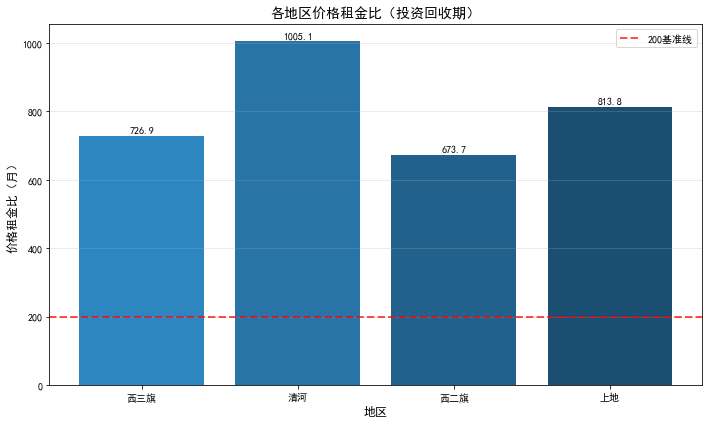

In [4]:
"""Figure A"""

# 绘制价格租金比条形图
if price_rent_ratios:
    print("\n" + "="*50)
    print("价格租金比图表")
    print("="*50)
    
    locations = [item['location_name'] for item in price_rent_ratios]
    ratios = [item['ratio'] for item in price_rent_ratios]
    
    plt.figure(figsize=(10, 6))
    blue_colors = ['#2E86C1', '#2874A6', '#21618C', '#1B4F72']
    bars = plt.bar(locations, ratios, color=blue_colors)
    
    for bar, ratio in zip(bars, ratios):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{ratio:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.title('各地区价格租金比（投资回收期）', fontsize=14)
    plt.xlabel('地区', fontsize=12)
    plt.ylabel('价格租金比（月）', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.axhline(y=200, color='red', linestyle='--', linewidth=2, alpha=0.7, label='200基准线')
    plt.legend()
    plt.tight_layout()
    plt.show()


线性回归模型

=== Model 1: 价格回归分析 ===
                            OLS Regression Results                            
Dep. Variable:         price_per_area   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     709.3
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:33:54   Log-Likelihood:                -48966.
No. Observations:                4295   AIC:                         9.794e+04
Df Residuals:                    4290   BIC:                         9.797e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.976e+

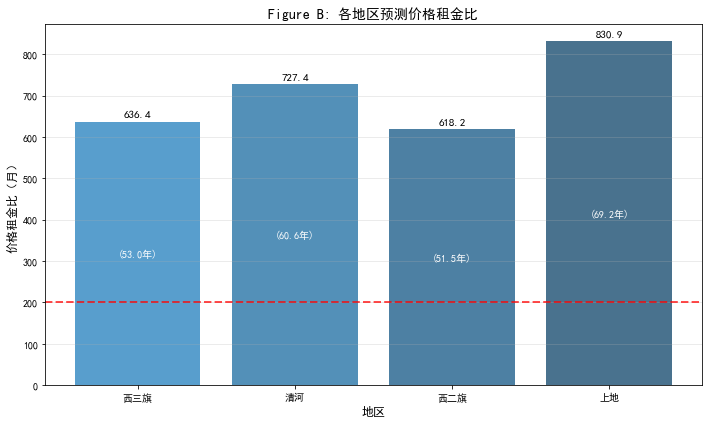

Figure B 已保存为 'figure_b_price_rent_ratio.png'

各地区价格租金比汇总
地区   | 价格中位数(元/㎡) | 租金中位数(元/月/㎡) | 价格租金比(月) | 回收期(年)
-------------------------------------------------------------------------------------
西三旗 |           56811 |              89.27 |         636.4 |      53.0
清河 |           98595 |             135.54 |         727.4 |      60.6
西二旗 |           65316 |             105.66 |         618.2 |      51.5
上地 |           89052 |             107.17 |         830.9 |      69.2

分析完成！


In [6]:
"""Figure B"""

# 线性回归
print("\n" + "="*60)
print("线性回归模型")
print("="*60)

import statsmodels.api as sm

# Model 1: 价格 = β0 + β1*面积 + β2*地区 + ε
print("\n=== Model 1: 价格回归分析 ===")

# 数据准备
X1_price = df_price[['area', 'location']].copy()
X1_price = pd.get_dummies(X1_price, columns=['location'], prefix='loc', drop_first=True)
X1_price = sm.add_constant(X1_price)
y1_price = df_price['price_per_area']

# OLS回归
model1 = sm.OLS(y1_price, X1_price).fit()

# 显示回归结果
print(model1.summary())

# 预测所有数据的价格
df_price['predicted_price_per_area'] = model1.predict(X1_price)

# Model 2: 租金 = β0 + β1*面积 + β2*地区 + ε
print("\n=== Model 2: 租金回归分析 ===")

# 准备数据
X2_rent = df_rent[['area', 'location']].copy()
X2_rent = pd.get_dummies(X2_rent, columns=['location'], prefix='loc', drop_first=True)
X2_rent = sm.add_constant(X2_rent)
y2_rent = df_rent['rent_per_area']

# OLS回归
model2 = sm.OLS(y2_rent, X2_rent).fit()

# 显示回归结果
print(model2.summary())

# 预测所有数据的租金
df_rent['predicted_rent_per_area'] = model2.predict(X2_rent)

# 计算每个地区的预测价格租金比（中位数价格比中位数租金）
print("\n" + "="*60)
print("计算各区域预测价格租金比")
print("="*60)

predicted_ratios_by_location = []

for location_id in range(1, 5):
    # 获取该地区的预测价格和租金
    df_price_loc = df_price[df_price['location'] == location_id]
    df_rent_loc = df_rent[df_rent['location'] == location_id]
    
    if not df_price_loc.empty and not df_rent_loc.empty:
        # 计算该地区的预测价格中位数和预测租金中位数
        predicted_price_median = df_price_loc['predicted_price_per_area'].median()
        predicted_rent_median = df_rent_loc['predicted_rent_per_area'].median()
        
        if predicted_rent_median > 0:
            price_rent_ratio = predicted_price_median / predicted_rent_median
            
            location_name = location_names[location_id]
            
            predicted_ratios_by_location.append({
                'location': location_id,
                'location_name': location_name,
                'price_median': predicted_price_median,
                'rent_median': predicted_rent_median,
                'ratio': price_rent_ratio,
                'price_samples': len(df_price_loc),
                'rent_samples': len(df_rent_loc)
            })
            
            print(f"{location_name}:")
            print(f"  预测价格中位数: {predicted_price_median:.0f}元/㎡")
            print(f"  预测租金中位数: {predicted_rent_median:.2f}元/月/㎡")
            print(f"  价格租金比: {price_rent_ratio:.1f}个月 ({price_rent_ratio/12:.1f}年)")

# Figure B: 绘制各地区预测价格租金比条形图
print("\n" + "="*60)
print("Figure B: 各地区预测价格租金比")
print("="*60)

if predicted_ratios_by_location:
    locations = [item['location_name'] for item in predicted_ratios_by_location]
    ratios = [item['ratio'] for item in predicted_ratios_by_location]
    
    # 创建条形图
    plt.figure(figsize=(10, 6))
    bars = plt.bar(locations, ratios, color=['#2E86C1', '#2874A6', '#21618C', '#1B4F72'], alpha=0.8)
    
    plt.title('Figure B: 各地区预测价格租金比', fontsize=14, fontweight='bold')
    plt.xlabel('地区', fontsize=12)
    plt.ylabel('价格租金比（月）', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.axhline(y=200, color='red', linestyle='--', linewidth=2, alpha=0.7, label='200基准线')
    
    # 添加数值标签
    for bar, ratio in zip(bars, ratios):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(ratios)*0.01, 
                f'{ratio:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # 添加年份标签
    for i, (bar, ratio) in enumerate(zip(bars, ratios)):
        years = ratio / 12
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 0.5, 
                f'({years:.1f}年)', ha='center', va='center', fontweight='bold', 
                color='white', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('figure_b_price_rent_ratio.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Figure B 已保存为 'figure_b_price_rent_ratio.png'")

# 汇总表格
print("\n" + "="*60)
print("各地区价格租金比汇总")
print("="*60)

print("地区   | 价格中位数(元/㎡) | 租金中位数(元/月/㎡) | 价格租金比(月) | 回收期(年)")
print("-" * 85)

for item in predicted_ratios_by_location:
    recovery_years = item['ratio'] / 12
    print(f"{item['location_name']} | {item['price_median']:>15.0f} | {item['rent_median']:>18.2f} | {item['ratio']:>13.1f} | {recovery_years:>9.1f}")

print("\n分析完成！")


非线性回归模型

=== Model 1+: 价格回归分析===
                            OLS Regression Results                            
Dep. Variable:         price_per_area   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     436.9
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:34:09   Log-Likelihood:                -48658.
No. Observations:                4295   AIC:                         9.734e+04
Df Residuals:                    4285   BIC:                         9.740e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

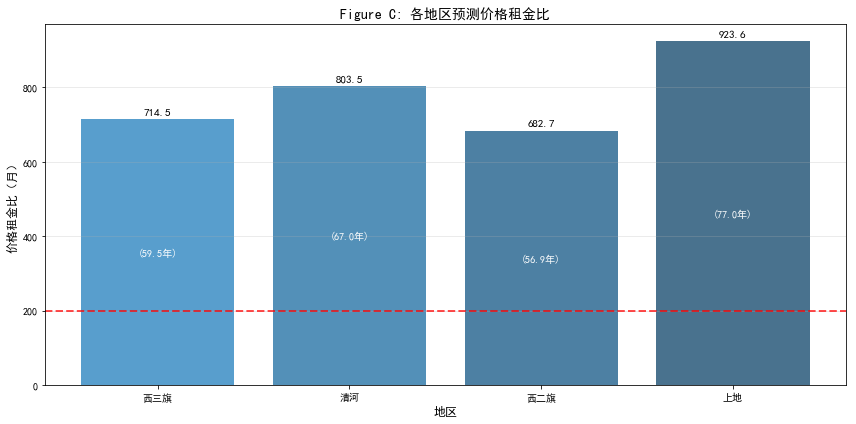

Figure C 已保存为 'figure_c_enhanced_price_rent_ratio.png'

三种方法价格租金比比较

方法比较:
1. Figure A - 直接使用原始数据
2. Figure B - 线性回归模型预测
3. Figure C - 包含非线性和交互项的模型预测

各地区价格租金比汇总:
地区   | A(月) | B(月) | C(月) | 样本量(价格/租金)
-----------------------------------------------------------------------------------------------
西三旗 |       726.9 |        636.4 |        714.5 | 1196/1103
清河 |      1005.1 |        727.4 |        803.5 | 1200/1200
西二旗 |       673.7 |        618.2 |        682.7 |  701/ 439
上地 |       813.8 |        830.9 |        923.6 | 1198/1080

可信度分析：
非线性和交互项模型在样本量较大时通常能提供更好的预测，但在样本量较小时可能存在过度拟合问题

分析完成！


In [7]:
"""Figure C"""

# 非线性回归（添加二次项、对数项和交互项）
print("\n" + "="*60)
print("非线性回归模型")
print("="*60)

import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Model 1+：
print("\n=== Model 1+: 价格回归分析===")

# 创建非线性和交互项
X1_enhanced = df_price[['area', 'location']].copy()
X1_enhanced['area_squared'] = X1_enhanced['area'] ** 2
X1_enhanced['area_log'] = np.log(X1_enhanced['area'] + 1)  

X1_enhanced = pd.get_dummies(X1_enhanced, columns=['location'], prefix='loc', drop_first=True)

for col in X1_enhanced.columns:
    if col.startswith('loc_'):
        X1_enhanced[f'{col}_area_interaction'] = X1_enhanced['area'] * X1_enhanced[col]

X1_enhanced = sm.add_constant(X1_enhanced)
y1_price = df_price['price_per_area']

# OLS回归
model1_plus = sm.OLS(y1_price, X1_enhanced).fit()

# 显示回归结果
print(model1_plus.summary())

# 预测价格
df_price['predicted_price_per_area_plus'] = model1_plus.predict(X1_enhanced)

# Model 2+:
print("\n=== Model 2+: 租金回归分析===")

# 创建非线性和交互项
X2_enhanced = df_rent[['area', 'location']].copy()
X2_enhanced['area_squared'] = X2_enhanced['area'] ** 2
X2_enhanced['area_log'] = np.log(X2_enhanced['area'] + 1)

X2_enhanced = pd.get_dummies(X2_enhanced, columns=['location'], prefix='loc', drop_first=True)

for col in X2_enhanced.columns:
    if col.startswith('loc_'):
        X2_enhanced[f'{col}_area_interaction'] = X2_enhanced['area'] * X2_enhanced[col]

X2_enhanced = sm.add_constant(X2_enhanced)
y2_rent = df_rent['rent_per_area']

# OLS回归
model2_plus = sm.OLS(y2_rent, X2_enhanced).fit()

# 显示回归结果
print(model2_plus.summary())

# 预测租金
df_rent['predicted_rent_per_area_plus'] = model2_plus.predict(X2_enhanced)

# 比较R²值
print("\n" + "="*60)
print("模型R²比较")
print("="*60)

print(f"Model 1 : R²= {model1.rsquared:.4f}")
print(f"Model 1+ : R²= {model1_plus.rsquared:.4f}")
print(f"R²提升: {model1_plus.rsquared - model1.rsquared:.4f}")

print(f"\nModel 2 : R²= {model2.rsquared:.4f}")
print(f"Model 2+ : R²= {model2_plus.rsquared:.4f}")
print(f"R²提升: {model2_plus.rsquared - model2.rsquared:.4f}")

# R²提升原因
print("\n" + "="*60)
print("R²提升原因分析")
print("="*60)
print("Model+添加了非线性特征和交互项，捕捉了价格、租金与面积的非线性关系并允许不同地区的面积效应不同，因而可能更加符合现实情况、能更好地解释数据中的变异。")

# 预测与计算价格租金比
print("\n" + "="*60)
print("预测与计算价格租金比")
print("="*60)

df_price_rent_ratio = pd.DataFrame()

for location_id in range(1, 5):
    df_price_loc = df_price[df_price['location'] == location_id].copy()
    df_rent_loc = df_rent[df_rent['location'] == location_id].copy()
    
    if not df_price_loc.empty and not df_rent_loc.empty:
        price_median_plus = df_price_loc['predicted_price_per_area_plus'].median()
        rent_median_plus = df_rent_loc['predicted_rent_per_area_plus'].median()
        
        if rent_median_plus > 0:
            ratio_plus = price_median_plus / rent_median_plus
            
            location_name = location_names[location_id]
            
            print(f"{location_name}:")
            print(f"  预测价格中位数: {price_median_plus:.0f}元/㎡")
            print(f"  预测租金中位数: {rent_median_plus:.2f}元/月/㎡")
            print(f"  价格租金比: {ratio_plus:.1f}个月 ({ratio_plus/12:.1f}年)")

# Figure C: 绘制各地区价格租金比条形图
print("\n" + "="*60)
print("Figure C: 各地区预测价格租金比")
print("="*60)

enhanced_ratios_by_location = []

for location_id in range(1, 5):
    df_price_loc = df_price[df_price['location'] == location_id]
    df_rent_loc = df_rent[df_rent['location'] == location_id]
    
    if not df_price_loc.empty and not df_rent_loc.empty:
        price_median_plus = df_price_loc['predicted_price_per_area_plus'].median()
        rent_median_plus = df_rent_loc['predicted_rent_per_area_plus'].median()
        
        if rent_median_plus > 0:
            ratio_plus = price_median_plus / rent_median_plus
            
            enhanced_ratios_by_location.append({
                'location': location_id,
                'location_name': location_names[location_id],
                'price_median': price_median_plus,
                'rent_median': rent_median_plus,
                'ratio': ratio_plus,
                'price_samples': len(df_price_loc),
                'rent_samples': len(df_rent_loc)
            })

if enhanced_ratios_by_location:
    locations = [item['location_name'] for item in enhanced_ratios_by_location]
    ratios = [item['ratio'] for item in enhanced_ratios_by_location]
    samples = [min(item['price_samples'], item['rent_samples']) for item in enhanced_ratios_by_location]
    
    # 创建条形图
    plt.figure(figsize=(12, 6))
    bars = plt.bar(locations, ratios, color=['#2E86C1', '#2874A6', '#21618C', '#1B4F72'], alpha=0.8)
    
    plt.title('Figure C: 各地区预测价格租金比', fontsize=14, fontweight='bold')
    plt.xlabel('地区', fontsize=12)
    plt.ylabel('价格租金比（月）', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    # 添加数值标签
    for i, (bar, ratio, sample) in enumerate(zip(bars, ratios, samples)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(ratios)*0.01, 
                f'{ratio:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
          
    # 添加年份标签
    for i, (bar, ratio) in enumerate(zip(bars, ratios)):
        years = ratio / 12
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 0.5, 
                f'({years:.1f}年)', ha='center', va='center', fontweight='bold', 
                color='white', fontsize=10)
    
    plt.axhline(y=200, color='red', linestyle='--', linewidth=2, alpha=0.7, label='200基准线')
    plt.tight_layout()
    plt.savefig('figure_c_enhanced_price_rent_ratio.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Figure C 已保存为 'figure_c_enhanced_price_rent_ratio.png'")

# 三种方法的价格租金比比较
print("\n" + "="*60)
print("三种方法价格租金比比较")
print("="*60)

print("\n方法比较:")
print("1. Figure A - 直接使用原始数据")
print("2. Figure B - 线性回归模型预测")
print("3. Figure C - 包含非线性和交互项的模型预测")

print("\n各地区价格租金比汇总:")
print("地区   | A(月) | B(月) | C(月) | 样本量(价格/租金)")
print("-" * 95)

# 收集原始方法的结果
original_ratios = []
for location_id in range(1, 5):
    df_price_loc = df_price[df_price['location'] == location_id]
    df_rent_loc = df_rent[df_rent['location'] == location_id]
    
    if not df_price_loc.empty and not df_rent_loc.empty:
        original_price = df_price_loc['price_per_area'].median()
        original_rent = df_rent_loc['rent_per_area'].median()
        
        if original_rent > 0:
            original_ratio = original_price / original_rent
            original_ratios.append({
                'location': location_id,
                'location_name': location_names[location_id],
                'ratio': original_ratio,
                'price_samples': len(df_price_loc),
                'rent_samples': len(df_rent_loc)
            })

# 输出比较表格
for i, location_id in enumerate(range(1, 5)):
    location_name = location_names[location_id]
    
    # 获取三种方法的结果
    original_ratio = next((item['ratio'] for item in original_ratios if item['location'] == location_id), None)
    basic_ratio = next((item['ratio'] for item in predicted_ratios_by_location if item['location'] == location_id), None)
    enhanced_ratio = next((item['ratio'] for item in enhanced_ratios_by_location if item['location'] == location_id), None)
    
    price_samples = len(df_price[df_price['location'] == location_id])
    rent_samples = len(df_rent[df_rent['location'] == location_id])
    
    if original_ratio and basic_ratio and enhanced_ratio:
        print(f"{location_name} | {original_ratio:>11.1f} | {basic_ratio:>12.1f} | {enhanced_ratio:>12.1f} | {price_samples:>4}/{rent_samples:>4}")

print("\n" + "="*60)
print("可信度分析：")

print("非线性和交互项模型在样本量较大时通常能提供更好的预测，但在样本量较小时可能存在过度拟合问题")

print("\n分析完成！")